In [13]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")

## California Housing Prices

In [413]:
data = pd.read_csv("housing.csv")
data.drop('ocean_proximity', axis = 1, inplace = True)
data.dropna(inplace = True)
data.reset_index(inplace = True)

In [349]:
data.head()

,index,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


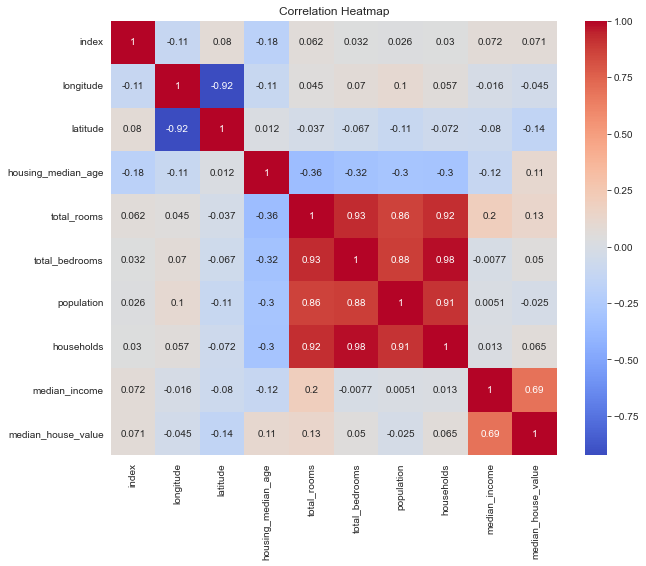

In [350]:
plt.figure(figsize = (10, 8))
correlations = data.corr()
sns.heatmap(correlations, annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Analysing the correlation heatmap, we can see that the following features have high degree of correlation amongst each other: <br>
- total_rooms <br>
- total_bedrooms <br>
- population <br>
- households

A linear regression model has been constructed using "population" as the target variable and rest as input features

In [351]:
import statsmodels.api as sm

input_features = ['total_rooms', 'total_bedrooms', 'households']
target_feature = 'population'

X = data[input_features]
Y = data[target_feature]

X = sm.add_constant(X)
model = sm.OLS(Y.astype(float), X.astype(float)).fit()

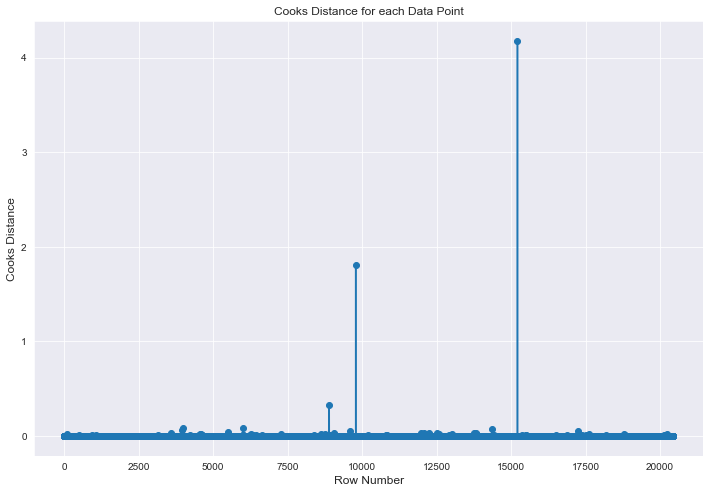

In [353]:
influence = model.get_influence()
cooks_dist = influence.cooks_distance
mean_dist = np.mean(cooks_dist[0])

plt.figure(figsize = (12, 8))
plt.scatter(data.index, cooks_dist[0])
plt.plot(data.index, cooks_dist[0])
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Cooks Distance for each Data Point')
plt.show()

In [354]:
data1 = data[['total_rooms', 'total_bedrooms', 'households', 'population']]
influential_points = data1.index[cooks_dist[0] > (4 * mean_dist)]
print("INFLUENTIAL POINTS")
data1.iloc[influential_points, :]

INFLUENTIAL POINTS


,total_rooms,total_bedrooms,households,population
95,5329.0,2477.0,2323.0,3469.0
104,5871.0,1914.0,1789.0,2689.0
116,5022.0,1750.0,1661.0,2558.0
483,5161.0,1744.0,1742.0,3276.0
506,7355.0,2408.0,2051.0,3100.0
...,...,...,...,...
20114,3445.0,898.0,894.0,5558.0
20132,15207.0,2924.0,2829.0,6301.0
20222,15572.0,2222.0,2152.0,5495.0
20246,25187.0,3521.0,3478.0,11956.0


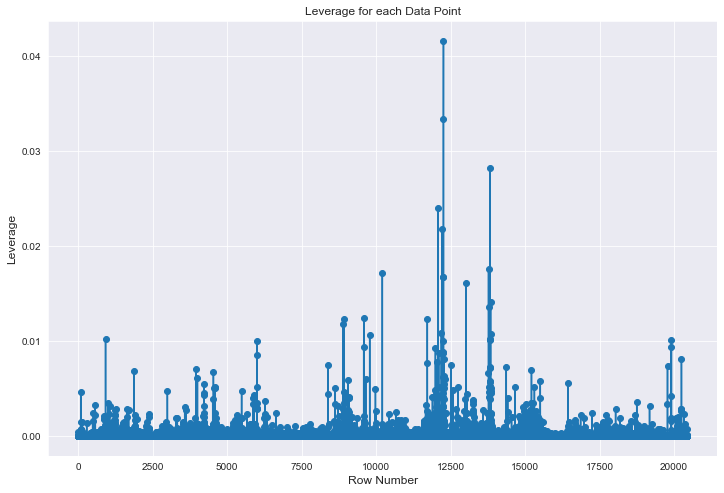

In [355]:
lev = influence.hat_matrix_diag
mean_lev = np.mean(lev)

plt.figure(figsize = (12, 8))
plt.scatter(data.index, lev)
plt.plot(data.index, lev)
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Leverage', fontsize = 12)
plt.title('Leverage for each Data Point')
plt.show()

In [356]:
leverage_points = data1.index[lev > (4 * mean_lev)]
print("LEVERAGE POINTS")
data1.iloc[leverage_points, :]

LEVERAGE POINTS


,total_rooms,total_bedrooms,households,population
95,5329.0,2477.0,2323.0,3469.0
98,3682.0,1270.0,1250.0,2024.0
104,5871.0,1914.0,1789.0,2689.0
116,5022.0,1750.0,1661.0,2558.0
283,12842.0,2048.0,1967.0,4985.0
...,...,...,...,...
20246,25187.0,3521.0,3478.0,11956.0
20322,10509.0,2186.0,2138.0,5633.0
20323,15018.0,3008.0,2962.0,7984.0
20336,6861.0,1820.0,1767.0,3717.0


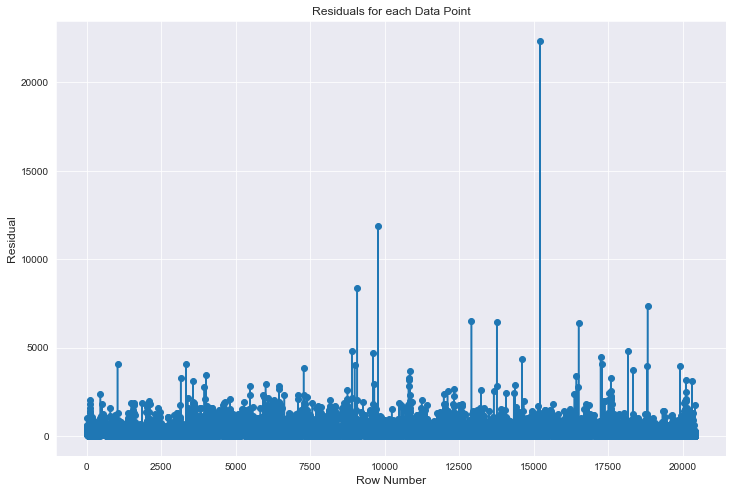

In [357]:
residuals = np.abs(model.resid)
mean_res = np.mean(residuals)

plt.figure(figsize = (12, 8))
plt.scatter(data.index, residuals)
plt.plot(data.index, residuals)
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)
plt.title('Residuals for each Data Point')
plt.show()

In [358]:
outlier_points = data1.index[residuals > (4 * mean_res)]
print("OUTLIER POINTS")
data1.iloc[outlier_points, :]

OUTLIER POINTS


,total_rooms,total_bedrooms,households,population
95,5329.0,2477.0,2323.0,3469.0
98,3682.0,1270.0,1250.0,2024.0
101,5806.0,1603.0,1497.0,2563.0
104,5871.0,1914.0,1789.0,2689.0
112,3959.0,1196.0,1217.0,1749.0
...,...,...,...,...
20207,7268.0,1729.0,1653.0,3232.0
20246,25187.0,3521.0,3478.0,11956.0
20320,1777.0,513.0,504.0,4479.0
20337,8800.0,1857.0,1832.0,6330.0


## Skillcraft

In [392]:
data = pd.read_csv("datasets/SkillCraft1_Dataset.csv")
data.drop('GameID', axis = 1, inplace = True)
data = data.replace('?', np.nan)
data.dropna(inplace = True)
data['Age'] = [int(age) for age in data['Age']]
data['HoursPerWeek'] = [int(hpw) for hpw in data['HoursPerWeek']]
data['TotalHours'] = [int(th) for th in data['TotalHours']]
data.reset_index(inplace = True)

In [393]:
data.head()

,index,LeagueIndex,Age,HoursPerWeek,TotalHours,APM,SelectByHotkeys,AssignToHotkeys,UniqueHotkeys,MinimapAttacks,MinimapRightClicks,NumberOfPACs,GapBetweenPACs,ActionLatency,ActionsInPAC,TotalMapExplored,WorkersMade,UniqueUnitsMade,ComplexUnitsMade,ComplexAbilitiesUsed
0,0,5,27,10,3000,143.7180,0.003515,0.000220,7,0.000110,0.000392,0.004849,32.6677,40.8673,4.7508,28,0.001397,6,0.0,0.000000
1,1,5,23,10,5000,129.2322,0.003304,0.000259,4,0.000294,0.000432,0.004307,32.9194,42.3454,4.8434,22,0.001193,5,0.0,0.000208
2,2,4,30,10,200,69.9612,0.001101,0.000336,4,0.000294,0.000461,0.002926,44.6475,75.3548,4.0430,22,0.000745,6,0.0,0.000189
3,3,3,19,20,400,107.6016,0.001034,0.000213,1,0.000053,0.000543,0.003783,29.2203,53.7352,4.9155,19,0.000426,7,0.0,0.000384
4,4,3,32,10,500,122.8908,0.001136,0.000327,2,0.000000,0.001329,0.002368,22.6885,62.0813,9.3740,15,0.001174,4,0.0,0.000019


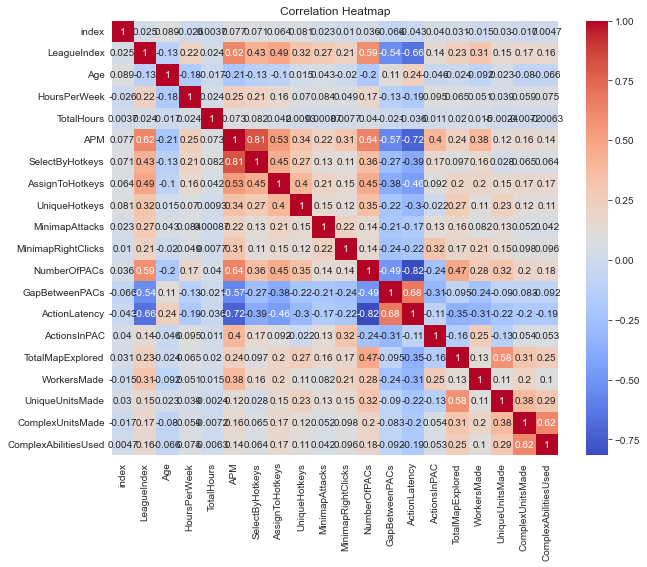

In [394]:
plt.figure(figsize = (10, 8))
correlations = data.corr()
sns.heatmap(correlations, annot = True, cmap = "coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [402]:
for col1 in data.columns:
    for col2 in data.columns:
        if correlations[col1][col2] > 0.6 and col1 != col2:
            print(col1, ',', col2)

LeagueIndex , APM
APM , LeagueIndex
APM , SelectByHotkeys
APM , NumberOfPACs
SelectByHotkeys , APM
NumberOfPACs , APM
GapBetweenPACs , ActionLatency
ActionLatency , GapBetweenPACs
ComplexUnitsMade , ComplexAbilitiesUsed
ComplexAbilitiesUsed , ComplexUnitsMade


In [403]:
input_features = ['LeagueIndex', 'SelectByHotkeys', 'NumberOfPACs']
target_feature = 'APM'

X = data[input_features]
Y = data[target_feature]

X = sm.add_constant(X)
model = sm.OLS(Y.astype(float), X.astype(float)).fit()

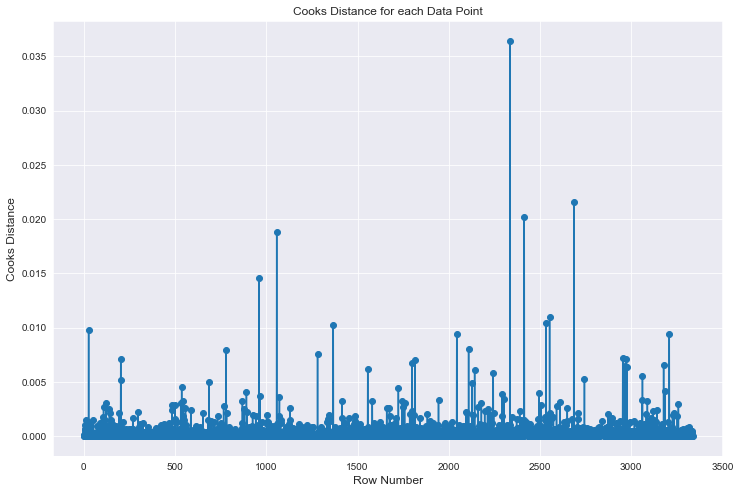

In [404]:
influence = model.get_influence()
cooks_dist = influence.cooks_distance
mean_dist = np.mean(cooks_dist[0])

plt.figure(figsize = (12, 8))
plt.scatter(data.index, cooks_dist[0])
plt.plot(data.index, cooks_dist[0])
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Cooks Distance', fontsize = 12)
plt.title('Cooks Distance for each Data Point')
plt.show()

In [405]:
data1 = data[['LeagueIndex', 'SelectByHotkeys', 'NumberOfPACs', 'APM']]
influential_points = data1.index[cooks_dist[0] > (4 * mean_dist)]
print("INFLUENTIAL POINTS")
data1.iloc[influential_points, :]

INFLUENTIAL POINTS


,LeagueIndex,SelectByHotkeys,NumberOfPACs,APM
10,3,0.001677,0.003772,153.8010
26,6,0.027815,0.005616,267.5586
52,5,0.005146,0.004790,199.6854
107,5,0.002483,0.002304,136.5768
108,6,0.015699,0.004501,262.6110
...,...,...,...,...
3209,6,0.026115,0.002999,217.3608
3227,2,0.005062,0.003506,156.7380
3235,1,0.002920,0.001426,98.7384
3253,5,0.023989,0.005166,252.1404


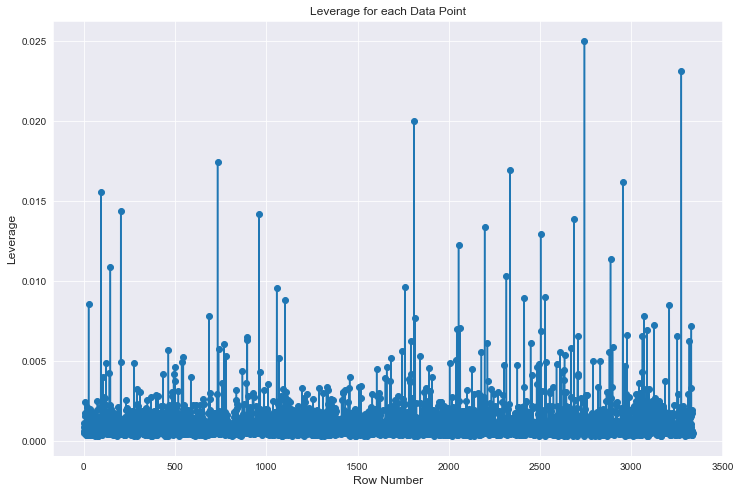

In [407]:
lev = influence.hat_matrix_diag
mean_lev = np.mean(lev)

plt.figure(figsize = (12, 8))
plt.scatter(data.index, lev)
plt.plot(data.index, lev)
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Leverage', fontsize = 12)
plt.title('Leverage for each Data Point')
plt.show()

In [408]:
leverage_points = data1.index[lev > (4 * mean_lev)]
print("LEVERAGE POINTS")
data1.iloc[leverage_points, :]

LEVERAGE POINTS


,LeagueIndex,SelectByHotkeys,NumberOfPACs,APM
26,6,0.027815,0.005616,267.5586
93,5,0.035638,0.004762,335.4990
122,5,0.021356,0.003606,200.9172
145,6,0.031282,0.004415,297.0672
202,5,0.033116,0.002970,327.7218
...,...,...,...,...
3209,6,0.026115,0.002999,217.3608
3253,5,0.023989,0.005166,252.1404
3275,5,0.042258,0.004159,372.6426
3319,6,0.021344,0.002619,209.1480


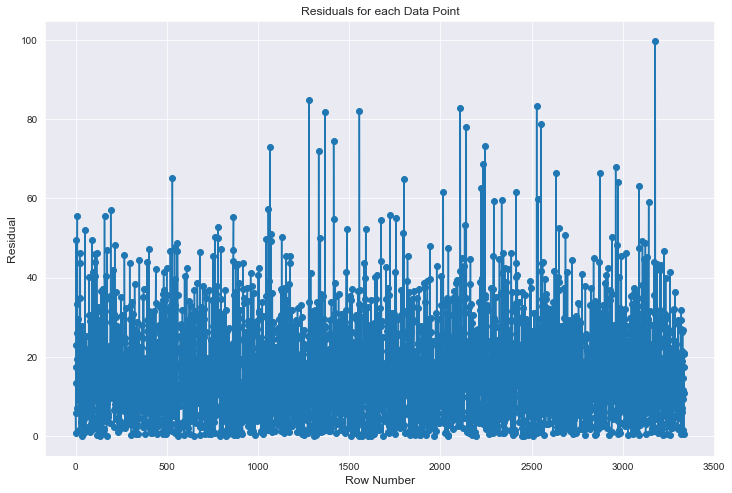

In [409]:
residuals = np.abs(model.resid)
mean_res = np.mean(residuals)

plt.figure(figsize = (12, 8))
plt.scatter(data.index, residuals)
plt.plot(data.index, residuals)
plt.xlabel('Row Number', fontsize = 12)
plt.ylabel('Residual', fontsize = 12)
plt.title('Residuals for each Data Point')
plt.show()

In [411]:
outlier_points = data1.index[residuals > (4 * mean_res)]
print("OUTLIER POINTS")
data1.iloc[outlier_points, :]

OUTLIER POINTS


,LeagueIndex,SelectByHotkeys,NumberOfPACs,APM
1066,4,0.002183,0.003034,169.0749
1281,5,0.000521,0.002241,163.9902
1333,4,0.001492,0.003049,163.8750
1367,5,0.016748,0.004051,292.5408
1415,4,0.001513,0.002234,153.9240
1556,3,0.007801,0.004230,226.6554
2109,6,0.007906,0.005719,268.0194
2142,4,0.010150,0.002330,214.2684
2235,5,0.006082,0.003884,208.3938
2244,1,0.001354,0.002707,141.6282
